This version of the snake game allows you to implement and run your evolutionary algorithm

In [1]:
import random
import time
import turtle

In [2]:
XSIZE = YSIZE = 16 # Number of grid cells in each direction (do not change this)

Change headless to True when evolving your solution. You can then pickle your final solution, and run it with this set to True to visualize the result, if you wish. Note that, when using Turtle,  to run it again properly you might need to go to restart your kernel after the visualization has finished.

If you are running on the cloud, or on Google Colab, you can chose to remove the turtle and display code altogether and only run headless. You could then pickle your best solution and use this code to see it play.

In [3]:
HEADLESS = False

In [4]:
class DisplayGame:
    def __init__(self, XSIZE, YSIZE):
        # SCREEN
        self.win = turtle.Screen()
        self.win.title("EVCO Snake game")
        self.win.bgcolor("grey")
        self.win.setup(width=(XSIZE*20)+40,height=(YSIZE*20)+40)
        #self.win.screensize((XSIZE*20)+20,(YSIZE*20)+20)
        self.win.tracer(0)

        #Snake Head
        self.head = turtle.Turtle()
        self.head.shape("square")
        self.head.color("black")

        # Snake food
        self.food = turtle.Turtle()
        self.food.shape("circle")
        self.food.color("yellow")
        self.food.penup()
        self.food.shapesize(0.55, 0.55)
        self.segments = []

    def reset(self, snake):
        self.segments = []
        self.head.penup()
        self.food.goto(-500, -500)
        self.head.goto(-500, -500)
        for i in range(len(snake)-1):
            self.add_snake_segment()
        self.update_segment_positions(snake)
       
    def update_food(self,new_food):
        self.food.goto(((new_food[1]-9)*20)+20, (((9-new_food[0])*20)-10)-20)
        
    def update_segment_positions(self, snake):
        self.head.goto(((snake[0][1]-9)*20)+20, (((9-snake[0][0])*20)-10)-20)
        for i in range(len(self.segments)):
            self.segments[i].goto(((snake[i+1][1]-9)*20)+20, (((9-snake[i+1][0])*20)-10)-20)

    def add_snake_segment(self):
        self.new_segment = turtle.Turtle()
        self.new_segment.speed(0)
        self.new_segment.shape("square")
        self.new_segment.color(random.choice(["green",'black','red','blue']))
        self.new_segment.penup()
        self.segments.append(self.new_segment)

In [5]:
class snake:
    def __init__(self, _XSIZE, _YSIZE):
        self.XSIZE = _XSIZE
        self.YSIZE = _YSIZE
        self.reset()
        self.score = 0
        self.lifeSpan = 0
        self.starved = 0
    
    def reset(self):
        self.snake = [[8,10], [8,9], [8,8], [8,7], [8,6], [8,5], [8,4], [8,3], [8,2], [8,1],[8,0] ]# Initial snake co-ordinates [ypos,xpos]
        self.food = self.place_food()
        self.ahead = []
        self.snake_direction = "right"
        self.score = 0
        self.lifeSpan = 0
        self.starved = 0

    def place_food(self):
        self.food = [random.randint(1, (YSIZE-2)), random.randint(1, (XSIZE-2))]
        while (self.food in self.snake):
            self.food = [random.randint(1, (YSIZE-2)), random.randint(1, (XSIZE-2))]
        return( self.food )
    
    def update_snake_position(self):
        self.snake.insert(0, [self.snake[0][0] + (self.snake_direction == "down" and 1) + (self.snake_direction == "up" and -1), self.snake[0][1] + (self.snake_direction == "left" and -1) + (self.snake_direction == "right" and 1)])

    def food_eaten(self):
        if self.snake[0] == self.food:                                            # When snake eats the food
            return True
        else:    
            last = self.snake.pop()  # [1] If it does not eat the food, it moves forward and so last tail item is removed
            return False
            
    def snake_turns_into_self(self):
        if self.snake[0] in self.snake[1:]:
            return True
        else:
            return False

    def snake_hit_wall(self):
        if self.snake[0][0] == 0 or self.snake[0][0] == (YSIZE-1) or self.snake[0][1] == 0 or self.snake[0][1] == (XSIZE-1):
            return True
        else:
            return False

    # Example sensing functions
    def getAheadLocation(self):
        #print(self.snake[0])
        self.ahead = [ self.snake[0][0] + (self.snake_direction == "down" and 1) + (self.snake_direction == "up" and -1), self.snake[0][1] + (self.snake_direction == "left" and -1) + (self.snake_direction == "right" and 1)] 
        
    def sense_wall_ahead(self):
        self.getAheadLocation()
        return( self.ahead[0] == 0 or self.ahead[0] == (YSIZE-1) or self.ahead[1] == 0 or self.ahead[1] == (XSIZE-1) )
        
    def sense_food_ahead(self):
        self.getAheadLocation()
        return self.food == self.ahead

    def sense_tail_ahead(self):
        self.getAheadLocation()
        return self.ahead in self.snake
    
# [-1, 1], [0, 1], [1, 1], [0, -1], [-1, -1], [1, -1], [-1, 0] and [1, 0] indicates changes on both x and y for example [0 , 1] 
# would be going north as it is adding 1 to the y and nothing to the x and [-1, 1] would be north west as it is going up and left
# by adding 1 to the y and minusing 1 on the x.
 
    def getInfoAboutSnake(self): 
        directions = [["N", [0, 1]], ["NE", [1, 1]], ["E", [1, 0]], ["SE", [1, -1]], ["S", [0, -1]], ["SW", [-1, -1]], ["W", [-1, 0]], ["NW", [-1, 1]]]
        wallInfo = [0, 0, 0, 0, 0, 0, 0, 0] 
        foodInfo = [0, 0, 0, 0, 0, 0, 0, 0]
        bodyInfo = [0, 0, 0, 0, 0, 0, 0, 0]
        badInfo = []
        info = []

        self.getAheadLocation()


        for i in range(8):
            nextPositionInDirection = self.snake[0]
            for f in range(20):
                nextPositionInDirection = [(nextPositionInDirection[0] + directions[i][1][0]), (nextPositionInDirection[1] + directions[i][1][1])]
                #print(str(self.snake[0]) + \" , \" + str(nextPositionInDirection))
                if(nextPositionInDirection == self.food):
                    foodInfo[i] = 1

                if(nextPositionInDirection in self.snake):
                    bodyInfo[i] = 1 / (f+1)

                if(( nextPositionInDirection[0] == 0 or nextPositionInDirection[0] == (YSIZE-1) or nextPositionInDirection[1] == 0 or nextPositionInDirection[1] == (XSIZE-1) )):
                    wallInfo[i] = 1 / (f+1)

        info = []
        
        for x in range(8):
            info.append(foodInfo[x])
            info.append(bodyInfo[x])
            info.append(wallInfo[x])
            
        return info
            
                         # it goes (N, NE, E, SE, S, SW, W, NW),
                    # a set looks like this (food tracking    ,     Body tracking      ,    wall tracking),
    # example of return [1/8, 1/7, 1,   0,0,0    0,0,0   0,0,0   0,0,0   0,0,0   0,0,0   0,0,0],
    #and for the input we have 8 sets of 3 one with each thing we track
    #each position in the list being represented by direction and what it has. So for food tracking there is 
    #food north of the heads position and the body is 7 tiles north and the wall is 8 tiles north
    
    def move_AI(self, AIbrain):
        output = AIbrain.feedForward(self.getInfoAboutSnake()) #decision making based on the position
        decision = np.argmax(output, axis=0)

        if decision == 0:
            return "up"

        elif decision == 1:
            return "down"

        elif decision == 2:
            return "left"
        
        elif decision == 3:
            return "right"

In [6]:
snake_game = snake(XSIZE,YSIZE)

In [7]:
if not HEADLESS:
    display = DisplayGame(XSIZE,YSIZE)

In [8]:
def run_game(display,snake_game, headless, AIbrain):

    score = 0
    snake_game.reset()
    if not headless:
        display.reset(snake_game.snake)
        display.win.update()
    snake_game.place_food()
    game_over = False
    snake_direction = "right"

    flag = True
    
    tickRate = 0
    while not game_over:
        
        # ****YOUR AI BELOW HERE******************
        tickRate = tickRate + 1 # calculate tick rate to determine if the snake starves or not
        snake_game.lifeSpan += 1 #to calculate fitness later
        snake_game.score = score

        new_snake_direction = snake_game.move_AI(AIbrain) # set snake direction
        snake_direction = new_snake_direction            
        snake_game.snake_direction = snake_direction

        
        # ****YOUR AI ABOVE HERE******************
            
        snake_game.update_snake_position()

        # Check if food is eaten
        if snake_game.food_eaten():
            snake_game.place_food()
            score += 1
            tickRate = 0
            #print("SCORE!!!!!!!!")
            if not headless: display.add_snake_segment()

        # Game over if the snake runs over itself
        if snake_game.snake_turns_into_self():
            game_over = True
            #print("Snake turned into itself!")

        # Game over if the snake goes through a wall
        if snake_game.snake_hit_wall():
            game_over = True
            #print("Snake hit a wall!")
           
         # Game over if the snake starves
        if tickRate > 300:
            game_over = True
            snake_game.starved = -25
            #print("snake starved")

        if not headless:       
            display.update_food(snake_game.food)
            display.update_segment_positions(snake_game.snake)
            display.win.update()
            time.sleep(0.05) # Change this to modify the speed the game runs at when displayed.

    #print("\nFINAL score - " + str(score))
    #print()
    if not headless: turtle.done()


Below is what you would use for your evaluation. You would also use it to display your final (pickled and loaded) solution, with headless = False.

If you have run without headless (i.e. with the display) you will need to reset your kernel to run again. This appears to be an IPython issue with Turtle, but if you have a way to deal with that, do please let me know. You will probable only want to run it one-at-a-time anyway.

In [9]:
class MLP(object):
    def __init__(self, numInput, numHidden1, numHidden2, numOutput):
        self.fitness = 0
        self.numInput = numInput + 1 # Add bias node from input to hidden layer 1 only
        self.numHidden1 = numHidden1 
        self.numHidden2 = numHidden2
        self.numOutput = numOutput

        self.w_i_h1 = np.random.randn(self.numHidden1, self.numInput) 
        self.w_h1_h2 = np.random.randn(self.numHidden2, self.numHidden1) 
        self.w_h2_o = np.random.randn(self.numOutput, self.numHidden2)

        self.ReLU = lambda x : max(0,x)

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum()
    
    def feedForward(self, inputs):
        inputsBias = inputs[:]
        inputsBias.insert(len(inputs),1)             # Add bias input

        h1 = np.dot(self.w_i_h1, inputsBias)         # feed input to hidden layer 1
        h1 = [self.ReLU(x) for x in h1]              # Activate hidden layer1
        
        h2 = np.dot(self.w_h1_h2, h1)                 # feed layer 1 to hidden layer 2
        h2 = [self.ReLU(x) for x in h2]              # Activate hidden layer 2

        output = np.dot(self.w_h2_o, h2)             # feed to output layer
        #output = [self.sigmoid(x) for x in output]   # Activate output layer
        return self.softmax(output)

    def getWeightsLinear(self):
        flat_w_i_h1 = list(self.w_i_h1.flatten())
        flat_w_h1_h2 = list(self.w_h1_h2.flatten())
        flat_w_h2_o = list(self.w_h2_o.flatten())
        return( flat_w_i_h1 + flat_w_h1_h2 + flat_w_h2_o )

    def setWeightsLinear(self, Wgenome):
        numWeights_I_H1 = self.numHidden1 * self.numInput
        numWeights_H1_H2 = self.numHidden2 * self.numHidden1
        numWeights_H2_O = self.numOutput * self.numHidden2

        self.w_i_h1 = np.array(Wgenome[:numWeights_I_H1])
        self.w_i_h1 = self.w_i_h1.reshape((self.numHidden1, self.numInput))
        
        self.w_h1_h2 = np.array(Wgenome[numWeights_I_H1:(numWeights_H1_H2+numWeights_I_H1)])
        self.w_h1_h2 = self.w_h1_h2.reshape((self.numHidden2, self.numHidden1))

        self.w_h2_o = np.array(Wgenome[(numWeights_H1_H2+numWeights_I_H1):])
        self.w_h2_o = self.w_h2_o.reshape((self.numOutput, self.numHidden2))

In [10]:
from deap import base
from deap import creator
from deap import tools
import numpy as np

In [11]:
numInputNodes = 24
numHiddenNodes1 = 20
numHiddenNodes2 = 16
numOutputNodes = 4

IND_SIZE = ((numInputNodes+1) * numHiddenNodes1) + (numHiddenNodes1 * numHiddenNodes2) + (numHiddenNodes2 * numOutputNodes)

In [12]:
myNet = MLP(numInputNodes, numHiddenNodes1, numHiddenNodes2, numOutputNodes)

In [13]:
#snakeGame = snake()

In [14]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -1.0, 1.0)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_float, n=IND_SIZE)

In [15]:
bestFitness = 0
bestScore = 0
bestLifeSpan = 0
def evaluate(indiv, myNet):
    global bestFitness
    global bestScore
    global bestLifeSpan

    fitness = 0
    tempFitness = 0
    myNet.setWeightsLinear(indiv)
    
    
    averaging = 3
    for x in range(averaging):
        run_game(display, snake_game, True, myNet)
        if snake_game.score < 10:
            fitness += (snake_game.lifeSpan) + (2 ** snake_game.score + ((snake_game.score ** 2.1) * 500)) #- ((snake_game.score ** 1.2) * ((0.25 * snake_game.lifeSpan)**1.3)))
        else:
            tempFitness = snake_game.lifeSpan
            tempFitness = tempFitness * (2 ** 10)
            tempFitness = tempFitness + ((10 ** 2.1) * 500)
            tempFitness = tempFitness * (snake_game.score - 9)
            fitness += tempFitness
    #fitness = (snake_game.lifeSpan / 50) + (2 ** (snake_game.score * 2)) #+ snake_game.starved
    #print(fitness)
    
    if(fitness/averaging > bestFitness):
        bestFitness = fitness/averaging
        bestScore = snake_game.score #saves the score of only the last snake. I am not interested in the avarage
        bestLifeSpan = snake_game.lifeSpan

    snake_game.reset()
    snake_game.lifeSpan = 0
    snake_game.score = 0
    snake_game.starved = 0
    return (fitness/averaging),

In [16]:
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selRoulette)

toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.3, indpb=0.2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [17]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [18]:
logbook = tools.Logbook()

pop = toolbox.population(n=2000)

fitnesses = [toolbox.evaluate(indiv, myNet) for indiv in pop]
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

In [ ]:
NGEN, CXPROB = 150, 0.0

for g in range(NGEN):
    print("-- Generation %i --" % g)
      
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values
          
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = [toolbox.evaluate(indiv, myNet) for indiv in invalid_ind]
    for ind, fit in zip(invalid_ind, fitnesses):
         ind.fitness.values = fit
   
    pop[:] = offspring
    record = stats.compile(pop)
    logbook.record(gen=g, **record)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

gen = logbook.select("gen")
_min = logbook.select("min")
_max = logbook.select("max")
avgs = logbook.select("avg")
stds = logbook.select("std")

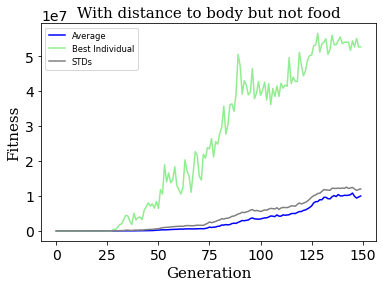

In [26]:
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14) 
plt.rc('legend', fontsize=14)

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, avgs, label = "Average" , color="blue")
font = {'family':'serif','size':15}
plt.title("With distance to body but not food", fontdict = font)
ax1.set_xlabel("Generation", fontdict = font)
ax1.set_ylabel("Fitness" , fontdict = font)

line2 = ax1.plot(gen, _max, label = "Best Individual", color="#90ee90")
std = ax1.plot(gen, stds, label = "STDs", color="grey")
leg = ax1.legend(loc='upper left', fontsize="small")
#print(stds)
#plt.bar(stds, y_dif, bottom=y_bot)
#line3 = ax1.plot(gen, _max)

In [25]:
print(snake_game.score)

42


In [24]:
print("The best was with a fitness of " + str(bestFitness) + " so a score of " + str(bestScore) + " that lived for " + str(bestLifeSpan) + " moves.")
bestInd = tools.selBest(pop, 1)[0]
myNet.setWeightsLinear(bestInd) 


The best was with a fitness of 0 so a score of 42 that lived for 0 moves.


In [21]:
run_game(display, snake_game, False, myNet)

In [33]:
def getAvaregeForPop(indv): #getting the averages for the population over 100 runs
    myNet.setWeightsLinear(indv)
    averaging = 100
    high = 0
    low = 100000
    score = 0
    for x in range(averaging):
        run_game(display, snake_game, True, myNet)
        score += snake_game.score
        if(high < snake_game.score):
            high = snake_game.score
        if(low > snake_game.score):
            low = snake_game.score
    print(score/averaging)
    print(high)
    print(low)

In [18]:
import pickle # to save and load the data 
filename = "logbook.pkl"
filename2 = "pop.pkl"
filename3 = "snek.pkl"
def saveLoad(opt):
    global bestInd
    global pop
    global logbook
    if opt == "save":
        f = open(filename, 'wb')
        pickle.dump(logbook, f)
        f = open(filename2, 'wb')
        pickle.dump(pop, f)
        f = open(filename3, 'wb')
        pickle.dump(bestInd, f)
        print ('data saved')
    elif opt == "load":
        f = open(filename, 'rb')
        logbook = pickle.load(f)
        f = open(filename2, 'rb')
        pop = pickle.load(f)
        f = open(filename3, 'rb')
        bestInd = pickle.load(f)
    else:
        print ('Invalid saveLoad option')

In [19]:
logbook = None
besdInd = None
pop = None
saveLoad("load")

#to load a state

<br><br><br><br>
With the objective of developing an evolutionary algorithm to play the Snake game, i have taken the following four steps:

1- Neural Network Architecture Definition:
In this step, the neural network architecture is being defined. The architecture has been designed to be similar to the one discussed in Week 6 of the practical, as it is deemed suitable for the task at hand. The architecture includes feedforward and weight setting, with two hidden layers of 20 and 16 nodes, respectively. The number of output nodes has been set to 4, which aligns with the 4 possible directions of movement for the snake. Each individual is being represented as the weights of the nural network. That is what is being evolved and mutated. I have decided to go with a nural network because they are compact and very efficient. Which is perfect to develop startegies that are more complicated.

2- Network Input Creation:
The network input comprises 24 different values, 8 for each cardinal direction. For each cardinal direction, the network returns 3 values, including the distance to the walls represented as (1/distance), the distance to the body represented as (1/distance), and the presence of an apple in that direction, represented as a binary 1 or 0. The cardinal directions have been set as (N, NE, E, SE, S, SW, W, NW). So the input would be one massive list of 24 numbers which could be disected after every 3 numbers to represent a cardinal direction (The first three numbers represent North and the second three North East so on). An example of a return [1/8, 1/7, 1,   0,0,0    0,0,0   0,0,0   0,0,0   0,0,0   0,0,0   0,0,0]. So for apple tracking there is apple north of the heads position and there is a part of the body that is 7 tiles north and the wall is 8 tiles north. (More information is in the commented section of the code) I have worked and tried different variations of the input that i will talk about shortly.

3- Fitness Function Creation:
The fitness function evaluates the snake based on two attributes: the length of time the snake survives and the number of apples it eats. To prevent sneaky behavior where the snake avoids apples and simply survives for a long time, a starvation function has been implemented, which starves the snake if it hasn't eaten an apple in 300 moves. To encourage apple eating, the first 10 apples eaten are scaled exponentially. To avoid luck-based outcomes, each snake is run three times, and the average fitness is calculated before moving on. I have tested different variations as in with or without avareging which I will talk about shortly.

4- DEAP Genetic Operators Set-Up:
The DEAP framework comes equipped with most of the tools required to complete the evolutionary network. Roulette selection has been chosen as it strikes a balance between exploration and exploitation in the search space. Every individual has a non-zero chance of being picked, with higher fitness resulting in a higher chance. Gaussian mutation has been selected as it enables small, random small changes to be made to the genetic information of individuals in the population as to not alter the snakes too drastically, which is deemed useful in the current scenario. The population has been set to 2000 snakes to increase the chances of a snake doing something right. Running for 150 generations.
<br><br><br><br>
In the implementation of Steps 2 and 3, significant adjustments were necessary to optimize performance. The primary areas of focus for Step 2 involved determining the most appropriate representation of distance data, specifically whether to display the distance to food or to indicate the presence of food in a given direction, as well as the distance to walls and the snake's body. For Step 3, various evaluations were conducted to assess the impact of averaging on the snake's performance. The eight distinct variations were systematically executed and labeled numerically, as illustrated in the accompanying image.
<br><br>

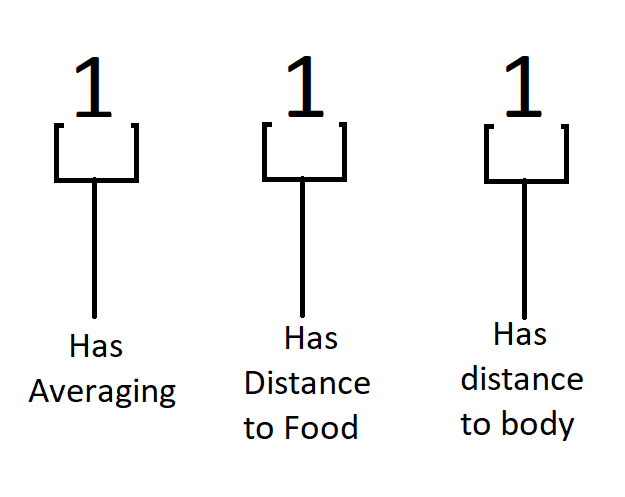

In [1]:
from IPython.display import Image
Image(filename='naming.png') 

so possible variations:

000- No averaging, Just 1 or 0 to represent food and body

001- No averaging, Just 1 or 0 to represent food and 1/distance to represent body

010- No averaging, 1/distance to represent food and Just 1 or 0 to represent body

011- No averaging, 1/distance to represent food and body

100- with averaging, Just 1 or 0 to represent food and body

101- with averaging, Just 1 or 0 to represent food and 1/distance to represent body

110- with averaging, 1/distance to represent food and Just 1 or 0 to represent body

111- with averaging, 1/distance to represent food and body

(Averaging is running the snake 3 times before evaluating the fitness).

So after running each of the 8 variations of the snake I have found the following data.

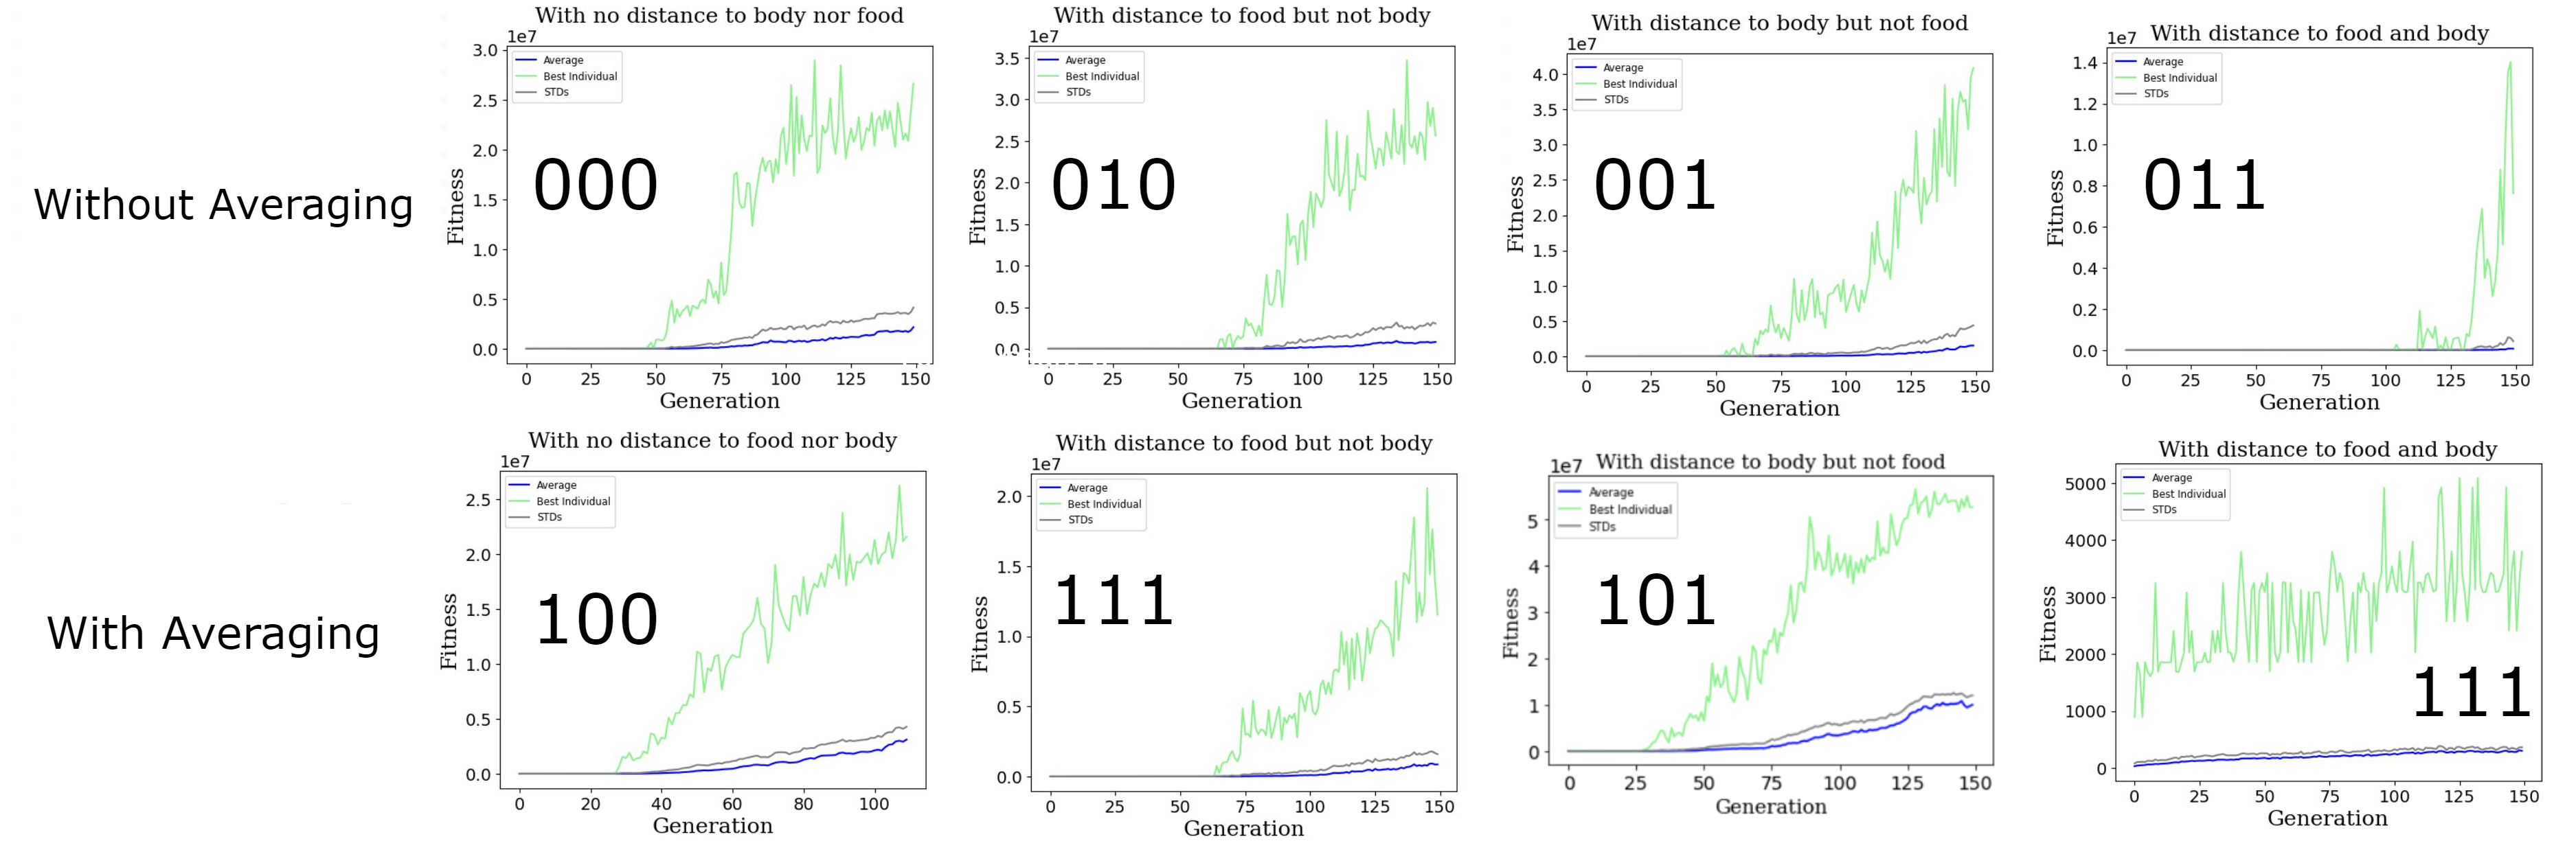

In [2]:
Image(filename='final.jpg') 

<h3><center>figure 1: graphs of fitness of each of the 8 variations</center></h3>

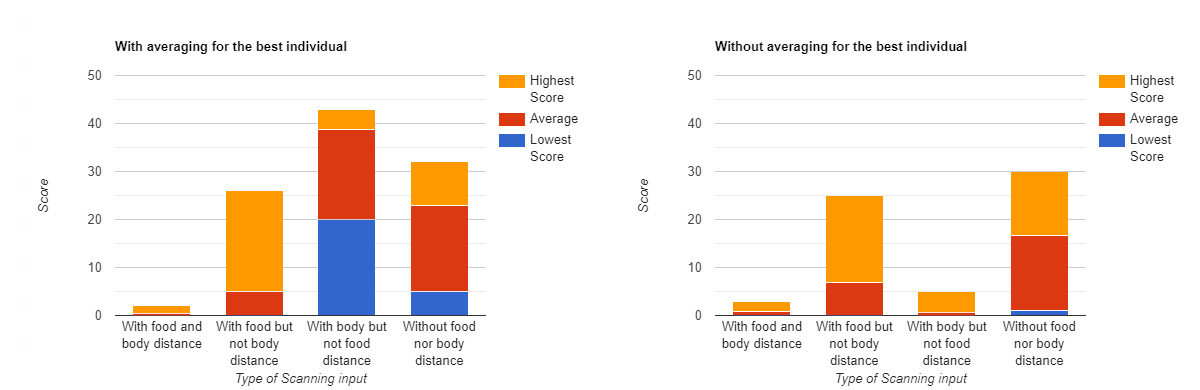

In [6]:
Image(filename='final2.jpg') 

<h3><center>figure 2: graphs of the score of each of the 8 variations best individual</center></h3>
<center>each individual ran 100 times to calculate the average and recording the lowest and highest score</center>

The decision to limit the simulation to 150 generations was based on the observation of diminishing returns in the best fitness performance, specifically variant 101 which incorporated distance information to the snake's body but not to food. As shown in Figure 1, the best fitness of this variant appeared to plateau after 150 generations. Additionally, it should be noted that running the simulation for a longer duration would have required a substantial investment of time, with the 150 generations already taking in excess of three hours to complete. Given these considerations, it was deemed that extending the simulation beyond 150 generations would fall outside the scope of the current capabilities and resources available.

Upon conducting each of the eight variants, the initial results were somewhat perplexing. However, upon closer examination,  it was determined that the most effective representation of distance information was one that was not excessive. Specifically, the inclusion of both distance to food and the snake's body in the inputs may have led the snakes (for snake 111 and 011) to perceive these distances as threats, as evidenced by the inconsistent fitness graphs depicted in Figure 1. The variants without distance information to the snake's body, namely 110, 100, 010, and 000, largely resulted in the snake colliding with its own tail, suggesting that the absence of this information may have impaired its ability to maintain awareness of its surroundings and its own body.

The most surprising outcome was observed in variants 101 and 001, which incorporated distance information to the snake's body but not to food. The inclusion of averaging in these variants resulted in the best performance of all the variants, with the snake adopting a strategy of remaining along the outskirts of the map, feeding on apples from above, and looping in a clockwise manner to avoid collision with its own body. This behavior was ultimately disrupted when the snake grew too large to continue looping along the map's perimeter, leading to its eventual deat at a score around 43. Which is why its average score was really close to its high score as can be shown in figure 1. Remarkably, the removal of averaging in these variants resulted in a substantial decline in performance, which was not observed in any other variant and its other counterpart. This discrepancy may be attributed to chance fluctuations (getting lucky) in the snake's evolution, as evidenced by the erratic fluctuations in the fitness graph.

The following gif is of the best snake from the middle to the end of its run (since its pretty long):

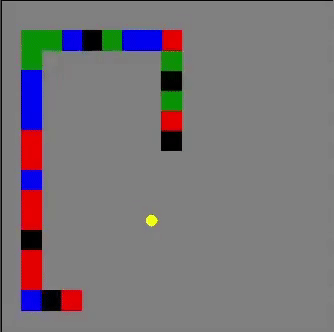

In [26]:
Image(filename='final.gif') 

<h3><center>figure 3: gif of the best snake (can only be viewed in jupyter and not in pdf)</center></h3>

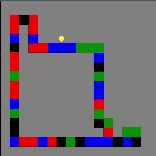

In [27]:
Image(filename='finalpositionofsnake.PNG') 

<h3><center>figure 4: final position of snake. it died the frame the gif ended</center></h3>

Based on the analysis of the simulation results, it is posited that further optimization of the snake's performance could be achieved by maintaining the use of the variant incorporating distance information to the snake's body but not to food and increasing the number of cardinal directions from 8 to 16 (figure 5) to give it an even better sense of its enviroment. It is anticipated that if the simulation were to be run for a longer duration beyond 150 generations, this enhanced configuration would result in improved performance. However, it is important to note that this hypothesis is contingent upon the current plateau in performance not being indicative of a fundamental limitation in the snake's ability to learn and improve. It is possible that the snake may overcome this plateau after a few additional generations, making it crucial to continue monitoring its performance in future simulations. Based on the current input system, it is likely that augmenting the number of layers in the neural network would yield minimal to negligible improvement. However, the introduction of additional cardinal directions may prove advantageous for a network with more layers as to not overload the individual with information. Moreover, it is anticipated that implementing the DEAP algorithm, which entails complete network restructuring rather than mere weight modification, would likely yield the optimal solution, surpassing the effectiveness of simply adding more layers.

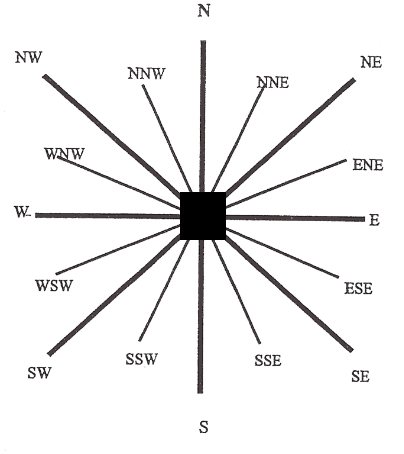

In [29]:
Image(filename='morecardinal directions.png') 

<h3><center>figure 5: more cardinal directions. The square being the head of the snake</center></h3>